<a href="https://colab.research.google.com/github/princealexanderm/ICT_DAS_Prince_Alex/blob/main/ICT_Exit_test_20_10_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Scenario:**

You have been hired by a real estate company to help them understand the factors influencing property prices in West Bandung Regency and Bandung City. The company has provided you with a dataset containing various attributes of properties, including their prices, locations, number of bedrooms, bathrooms, carports, land size, and building size. They are particularly interested in knowing:

**Key Drivers of Price:** Identify which features (e.g., location, number of bedrooms, land size) have the most significant impact on property prices.

**Location Analysis:** Determine if there are noticeable differences in property prices between West Bandung Regency and Bandung City, and what factors contribute to these differences.

**Property Recommendations:** Suggest what kind of properties would be a good investment for clients looking to buy a house with a budget of less than 1 billion IDR, taking into account both location and property features.


**Tasks:**

Perform exploratory data analysis (EDA) to summarize the key insights from the dataset, focusing on patterns, trends, and outliers.
Build a model to predict property prices based on the available features.
Evaluate the model’s performance using appropriate metrics.
Based on your findings, write a detailed report explaining the results and provide recommendations for both the real estate company and potential property buyers.

**1.Load all the necessary modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

**2. Load the data file**

In [2]:
df = pd.read_excel('dataset.xlsx')
df.head()

,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


**3. Shape of the dataframe**

In [3]:
df.shape

(32536, 12)

**4. Basic information of the data frame**

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    32536 non-null  int64  
 1   Price         32536 non-null  float64
 2   Location      32527 non-null  object 
 3   Bedroom       32536 non-null  int64  
 4   Bathroom      32521 non-null  float64
 5   Carport       32521 non-null  float64
 6   Land          32533 non-null  float64
 7   Building      32527 non-null  float64
 8   Month         32527 non-null  float64
 9   City/Regency  32527 non-null  object 
 10  Latitude      32526 non-null  float64
 11  Longitude     32527 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 3.0+ MB
None


**5. Basic statistic of the data frame**

In [5]:
df.describe()

,Unnamed: 0,Price,Bedroom,Bathroom,Carport,Land,Building,Month,Latitude,Longitude
count,32536.000000,3.253600e+04,32536.000000,32521.000000,32521.000000,32533.000000,32527.000000,32527.000000,32526.000000,32527.000000
mean,25966.194308,2.554932e+09,3.524158,2.527721,1.052120,181.392002,179.397485,8.988533,-6.923486,107.625922
std,15468.621566,1.879994e+09,1.235943,1.074318,0.796993,107.491313,108.516303,0.821016,0.051064,0.075701
min,0.000000,1.020000e+07,1.000000,1.000000,0.000000,37.000000,37.000000,8.000000,-7.230321,107.434849
25%,12565.750000,1.200000e+09,3.000000,2.000000,0.000000,105.000000,100.000000,8.000000,-6.952981,107.590747
50%,25392.000000,2.000000e+09,3.000000,2.000000,1.000000,147.000000,150.000000,9.000000,-6.931934,107.626219
75%,39255.250000,3.365000e+09,4.000000,3.000000,2.000000,225.000000,235.000000,10.000000,-6.886334,107.659881
max,53466.000000,9.700000e+09,8.000000,7.000000,3.000000,612.000000,585.000000,10.000000,-6.734761,107.886580


Null values in df

In [6]:
print(df.isna().sum())

Unnamed: 0       0
Price            0
Location         9
Bedroom          0
Bathroom        15
Carport         15
Land             3
Building         9
Month            9
City/Regency     9
Latitude        10
Longitude        9
dtype: int64


There are null values in Location, Bathroom, Carport, Land, Building, Month, City/Regency, Latituted and Longitude

Null values in everything except price

**6. Check outliers in the dataframe**

In [7]:
numerical=df.select_dtypes(include=[np.number])
numerical.head()

,Unnamed: 0,Price,Bedroom,Bathroom,Carport,Land,Building,Month,Latitude,Longitude
0,0,1.600000e+09,2,1.0,1.0,72.0,50.0,8.0,-6.843600,107.478400
1,1,8.500000e+08,2,1.0,1.0,70.0,80.0,8.0,-6.803228,107.581804
2,2,8.750000e+08,3,2.0,1.0,60.0,70.0,8.0,-6.965549,107.637926
3,3,1.750000e+09,2,3.0,1.0,90.0,94.0,8.0,-6.993945,107.643700
4,4,4.900000e+09,4,4.0,0.0,200.0,300.0,8.0,-6.947036,107.596271


**7. Outlier checking**

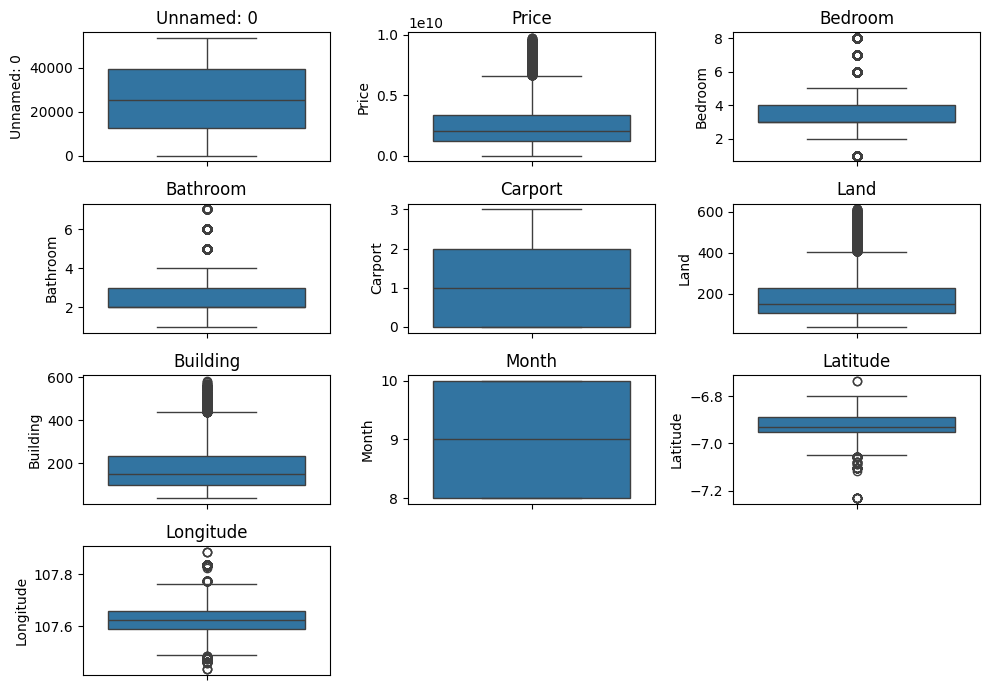

In [8]:
plt.figure(figsize=(10,7))
for i, col in enumerate(numerical.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data=numerical, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

Outliers in : Price , bedroom, bathroom, Land, building, latitude and longitude

No outliers in : Carport, month

In [9]:
df.head(5)

,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


In [10]:
df['Location'].unique()

array(['Padalarang', 'Parongpong', 'Buah Batu', 'Bojongsoang',
       'Bojongloa Kidul', 'Gedebage', 'Lengkong', 'Regol',
       'Bandung Kulon', 'Cibeunying Kaler', 'Andir', 'Margahayu',
       'Bojongloa Kaler', 'Rancasari', 'Antapani', 'Batununggal',
       'Sukasari', 'Arcamanik', nan, 'Soreang', 'Coblong', 'Cibiru',
       'Sukajadi', 'Margaasih', 'Cidadap', 'Cibeunying Kidul', 'Cileunyi',
       'Cicendo', 'Cicalengka', 'Bandung Wetan', 'Ujungberung',
       'Cimenyan', 'Astanaanyar', 'Banjaran', 'Lembang', 'Bandung Kidul',
       'Paseh', 'Baleendah', 'Katapang', 'Rancaekek', 'Kiaracondong',
       'Cinambo', 'Panyileukan', 'Ciparay', 'Babakan Ciparay', 'Ngamprah',
       'Mandalajati', 'Cisarua', 'Pameungpeuk', 'Cangkuang', 'Cimaung',
       'Dayeuhkolot', 'Cilengkrang', 'Sumur Bandung', 'Kutawaringin',
       'Ciwidey', 'Batujajar', 'Cikalong Wetan', 'Kertasari',
       'Pasirjambu', 'Arjasari', 'Majalaya', 'Nagreg', 'Cililin',
       'Rancabali', 'Cikancung', 'Cipeundeuy'], d

In [11]:
df['Location'].nunique()

66

In [12]:
print(df['Location'].value_counts())

Location
Buah Batu         2781
Padalarang        2560
Sukasari          2002
Margaasih         1817
Antapani          1707
                  ... 
Cikalong Wetan       2
Cililin              2
Rancabali            1
Cikancung            1
Cipeundeuy           1
Name: count, Length: 66, dtype: int64


In [13]:
print(df['City/Regency'].value_counts())

City/Regency
Bandung City            23999
Bandung Regency          5080
West Bandung Regency     3448
Name: count, dtype: int64


In [14]:
print(df['City/Regency'].unique())

['West Bandung Regency' 'Bandung City' 'Bandung Regency' nan]


**8. Removing unnamed column**

In [15]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
df.head(5)

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


In [17]:
df.shape

(32536, 11)

**9. Univariate analysis**

In [18]:
df.columns

Index(['Price', 'Location', 'Bedroom', 'Bathroom', 'Carport', 'Land',
       'Building', 'Month', 'City/Regency', 'Latitude', 'Longitude'],
      dtype='object')

In [19]:
uni=['Location', 'Bedroom', 'Bathroom', 'Carport',
       'Land', 'Building', 'Month', 'City/Regency', 'Latitude', 'Longitude']

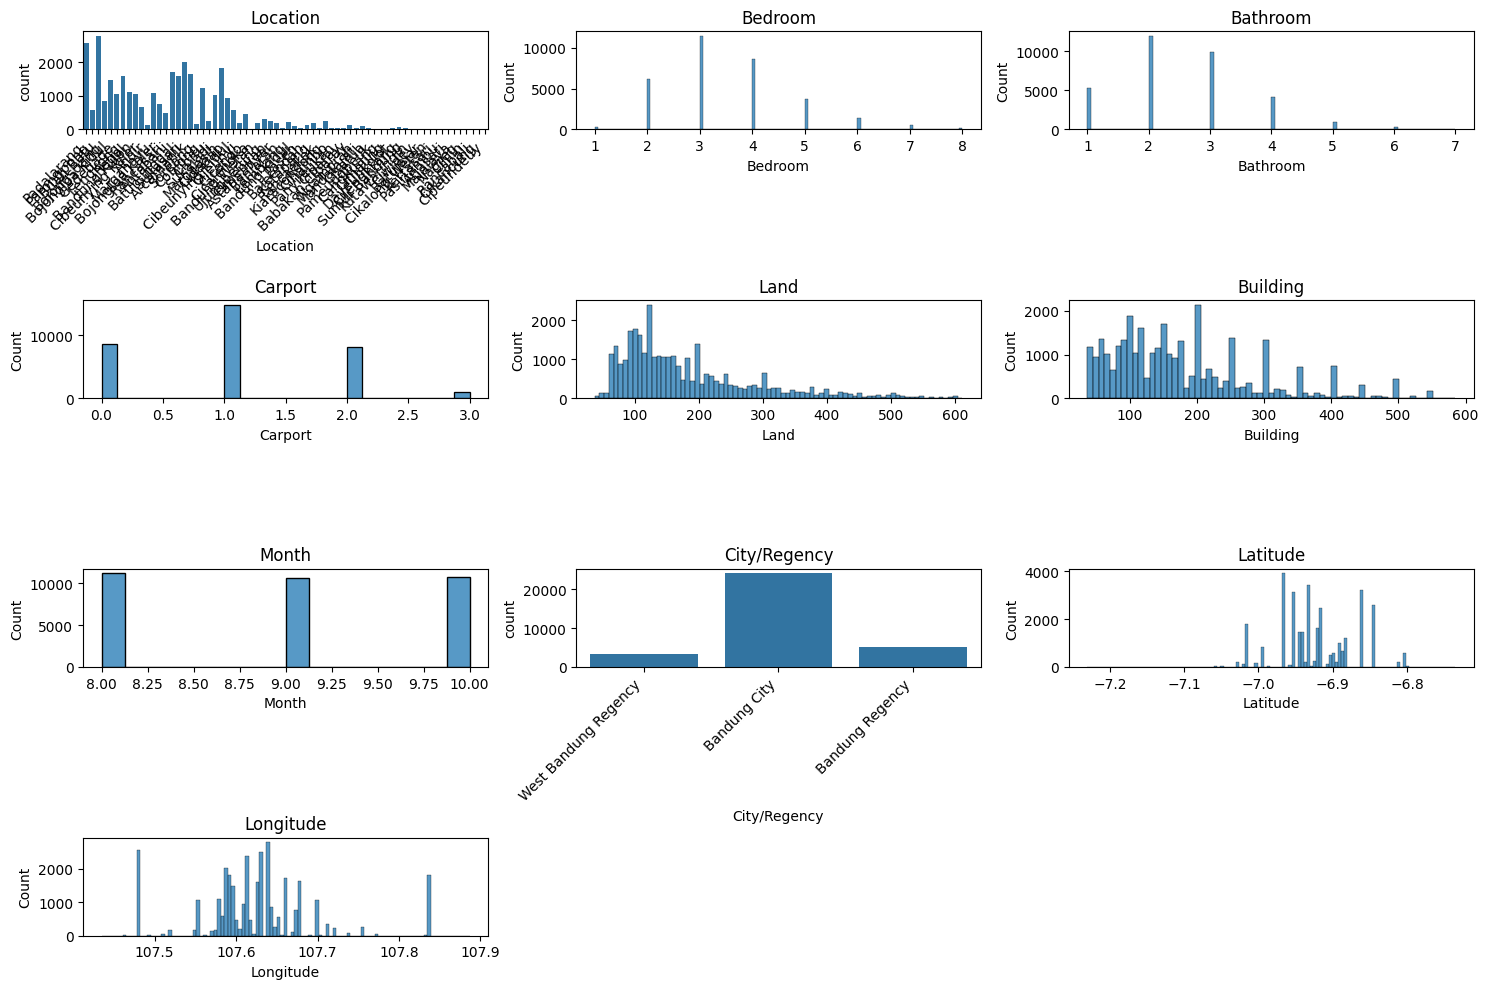

In [20]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(uni):
  plt.subplot(4, 3, i + 1)
  if df[col].dtype == 'object':
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45, ha='right')
  else:
    sns.histplot(data=df, x=col)
  plt.title(col)
plt.tight_layout()
plt.show()

**10. Bivariate analysis of each parameter with targt 'price'**

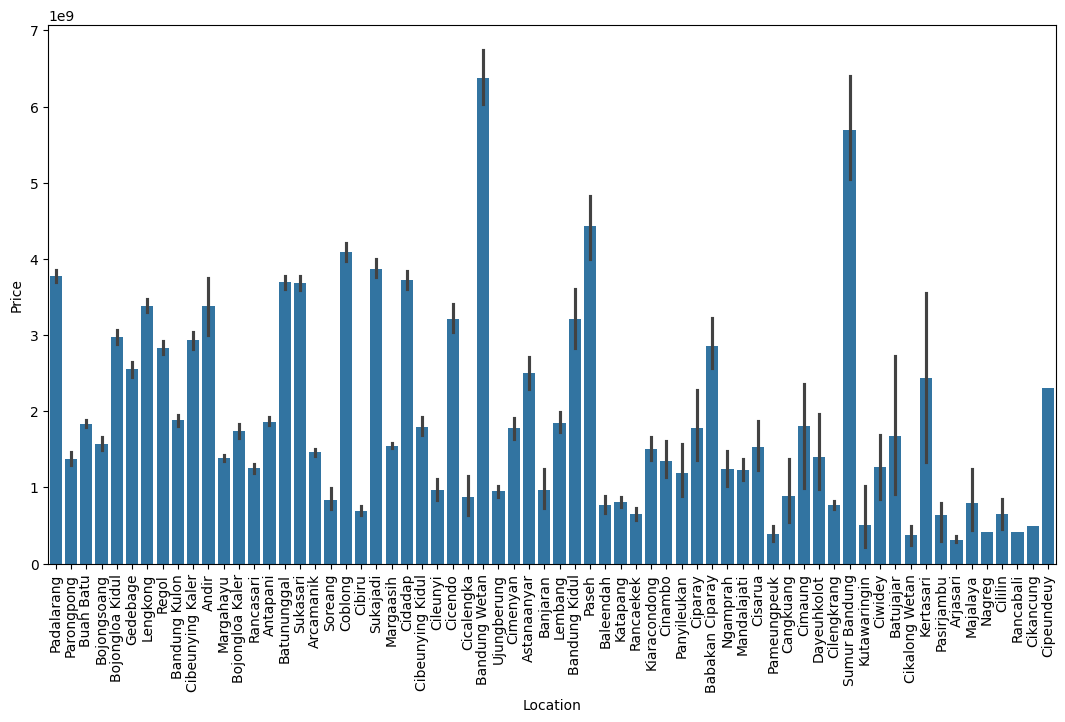

In [21]:
plt.figure(figsize=(13,7))
sns.barplot(data=df, x='Location', y='Price')
plt.xticks(rotation=90)
plt.show()

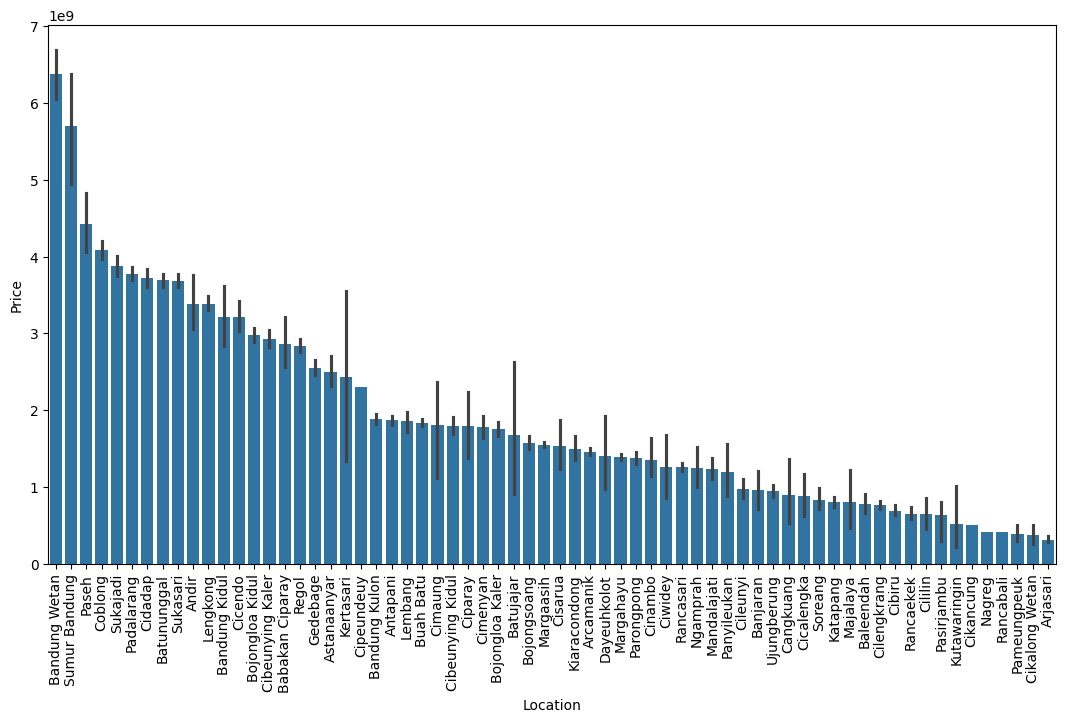

In [22]:
plt.figure(figsize=(13,7))
sns.barplot(data=df, x='Location', y='Price', order=df.groupby('Location')['Price'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

Some locations are extremely pricy. So price is a key driver

In [23]:
df.columns

Index(['Price', 'Location', 'Bedroom', 'Bathroom', 'Carport', 'Land',
       'Building', 'Month', 'City/Regency', 'Latitude', 'Longitude'],
      dtype='object')

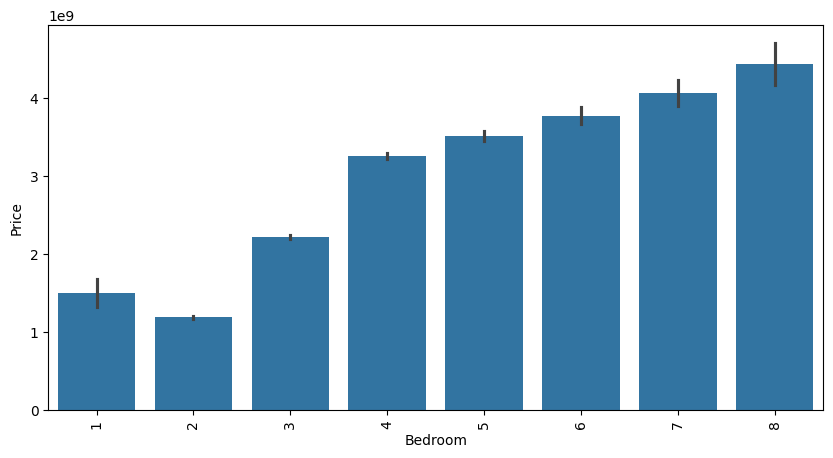

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Bedroom', y='Price')
plt.xticks(rotation=90)
plt.show()

- Number of bedroom is a keyfactor affecting price
- Two bedroom apartment has less price than one
- Price almost double when go from 2 to 3 bedroom

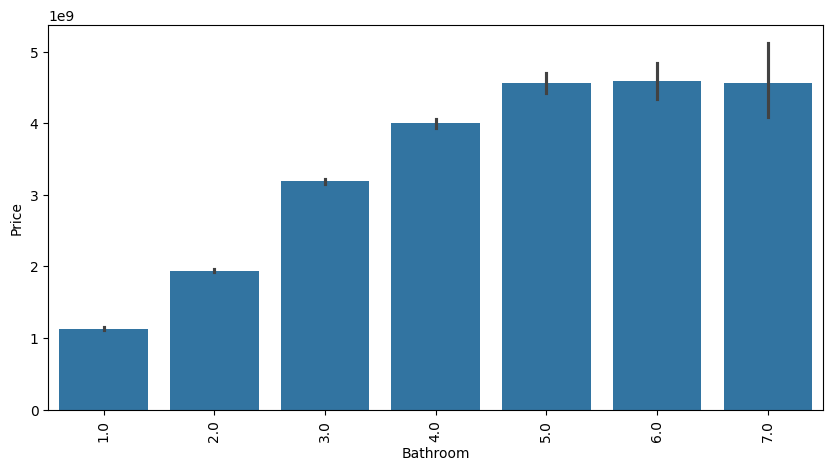

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Bathroom', y='Price')
plt.xticks(rotation=90)
plt.show()

- price of 5,6,7 bathroom apartments are the same

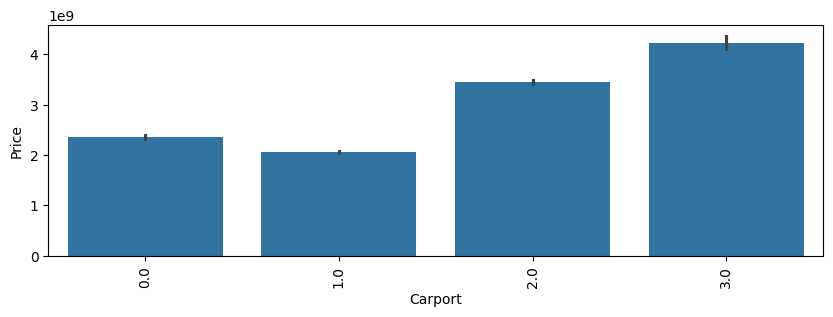

In [26]:
plt.figure(figsize=(10,3))
sns.barplot(data=df, x='Carport', y='Price')
plt.xticks(rotation=90)
plt.show()

- zero carport has more price than one carport

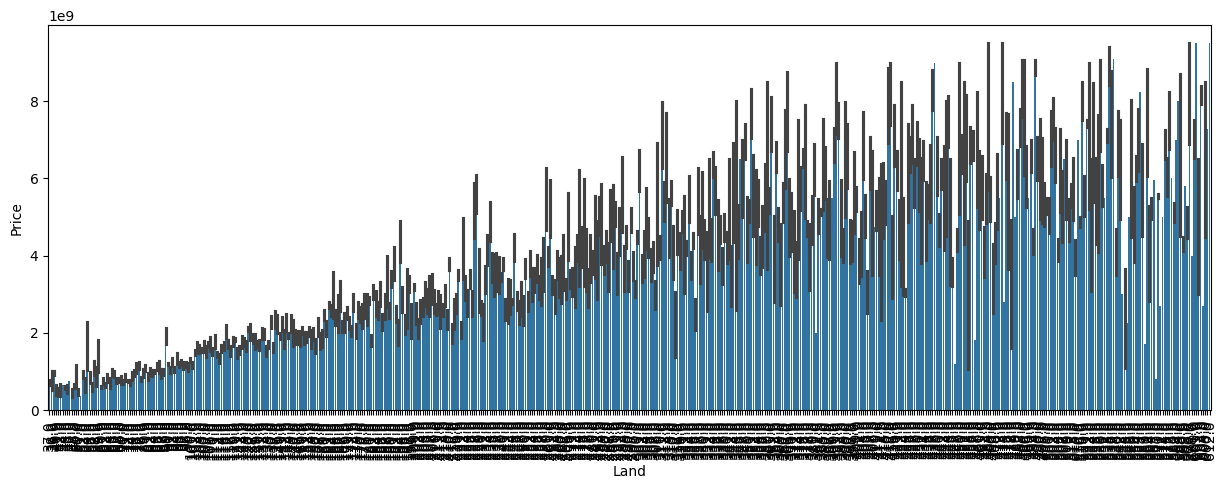

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='Land', y='Price')
plt.xticks(rotation=90)
plt.show()

In [28]:
df['Land'].value_counts()

,count
Land,
120.0,1302
200.0,906
90.0,804
72.0,765
60.0,655
...,...
598.0,1
531.0,1
516.0,1


In [29]:
df['Land'].max()

612.0

In [30]:
df['Land'].min()

37.0

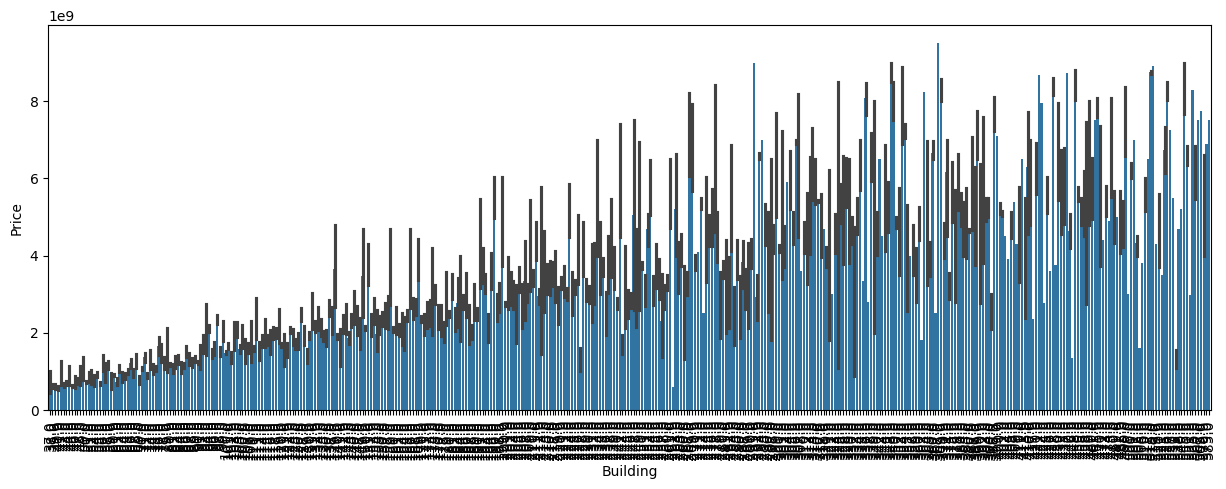

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='Building', y='Price')
plt.xticks(rotation=90)
plt.show()

In [32]:
df['Building'].unique()

array([ 50.,  80.,  70.,  94., 300., 169., 170., 235., 165., 168., 200.,
       280.,  78., 160., 120., 140., 105., 118.,  98., 265., 260., 336.,
       151., 162., 287., 193., 214., 212., 130., 145., 500., 325., 250.,
        52., 400., 124., 415., 100., 217.,  40.,  93.,  99., 216., 240.,
       110., 450., 245., 239., 275., 133., 180.,  57.,  60.,  85., 350.,
        45.,  96., 153.,  62., 270.,  91., 210., 202., 125., 221., 246.,
        59., 142., 197., 301.,  55., 562., 256., 135.,  71., 354.,  42.,
        41.,  90.,  65.,  75., 134., 297., 220., 119., 123., 144., 211.,
        72., 425., 393.,  86.,  nan, 320.,  48.,  38., 150., 155., 167.,
       345., 205., 112.,  56., 267., 131., 201., 550.,  54.,  76.,  95.,
       115., 254.,  97., 108., 188., 230., 101., 290., 196., 190.,  92.,
       175., 435., 244., 114.,  88., 136.,  87., 102., 223.,  66., 198.,
       225., 106., 271., 172., 238., 208., 560.,  89., 258., 218., 427.,
       330., 520., 485., 473., 164.,  68., 380., 26

In [33]:
df['Building'].max()

585.0

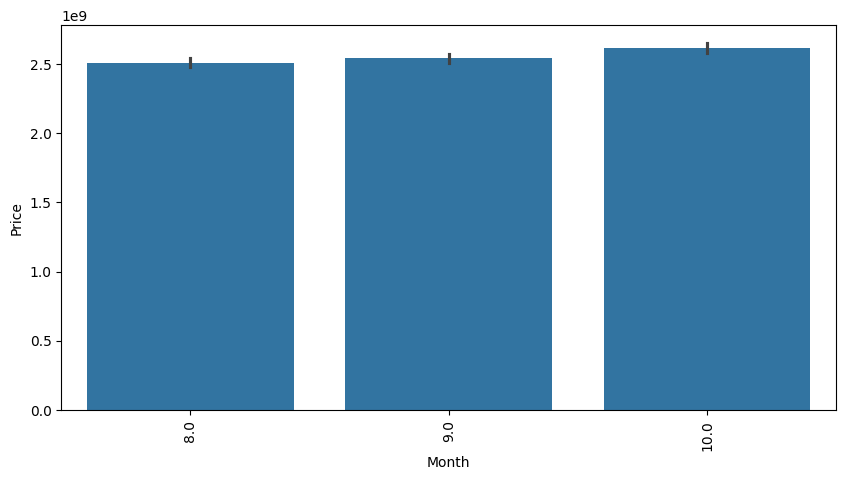

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Month', y='Price')
plt.xticks(rotation=90)
plt.show()

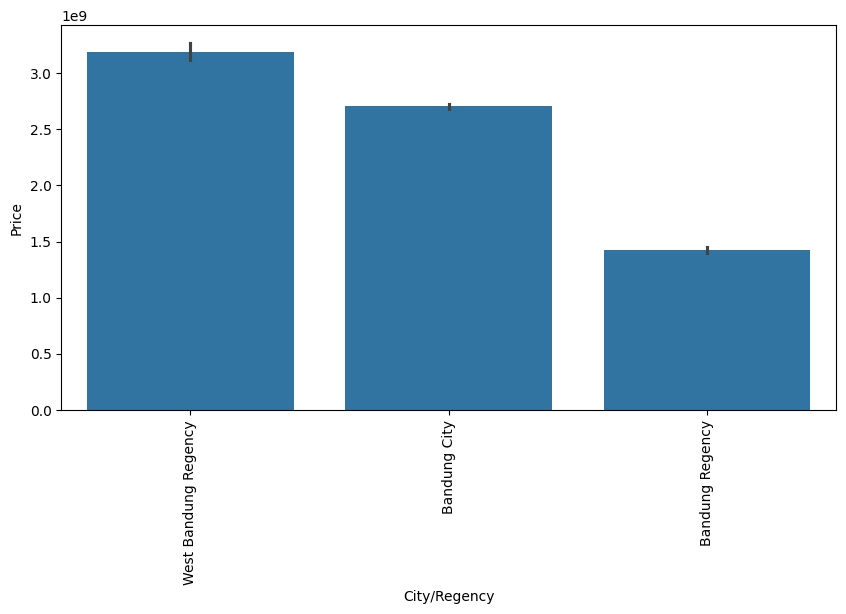

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='City/Regency', y='Price')
plt.xticks(rotation=90)
plt.show()

Price in west Bandung Regency is slightly larger than Bandung city

In [36]:
average_bedrooms_bandung_regency = df[df['City/Regency'] == 'Bandung Regency']['Bedroom'].mean()
average_bedrooms_bandung_city = df[df['City/Regency'] == 'Bandung City']['Bedroom'].mean()

print(f"Average number of bedrooms in Bandung Regency: {average_bedrooms_bandung_regency:.2f}")
print(f"Average number of bedrooms in Bandung City: {average_bedrooms_bandung_city:.2f}")

Average number of bedrooms in Bandung Regency: 3.06
Average number of bedrooms in Bandung City: 3.66


In [37]:
average_land_bandung_regency = df[df['City/Regency'] == 'Bandung Regency']['Land'].mean()
average_land_bandung_city = df[df['City/Regency'] == 'Bandung City']['Land'].mean()

print(f"Average land size in Bandung Regency: {average_land_bandung_regency:.2f}")
print(f"Average land size in Bandung City: {average_land_bandung_city:.2f}")

Average land size in Bandung Regency: 135.40
Average land size in Bandung City: 188.97


It is not the land and number of bedrooms making the difference. Hence the regency is making the differnce

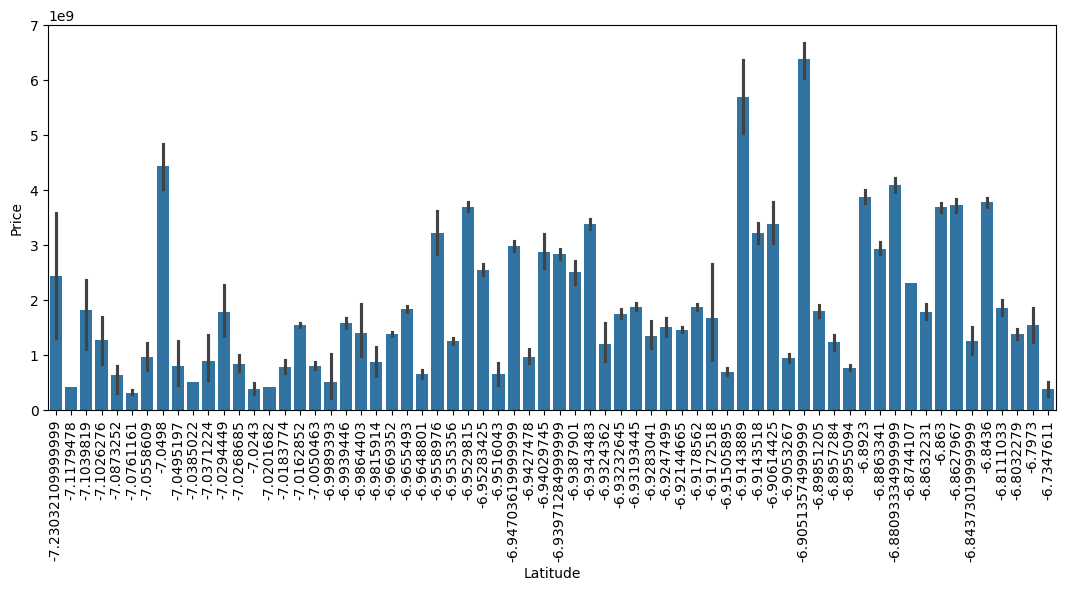

In [38]:
plt.figure(figsize=(13,5))
sns.barplot(data=df, x='Latitude', y='Price')
plt.xticks(rotation=90)
plt.show()

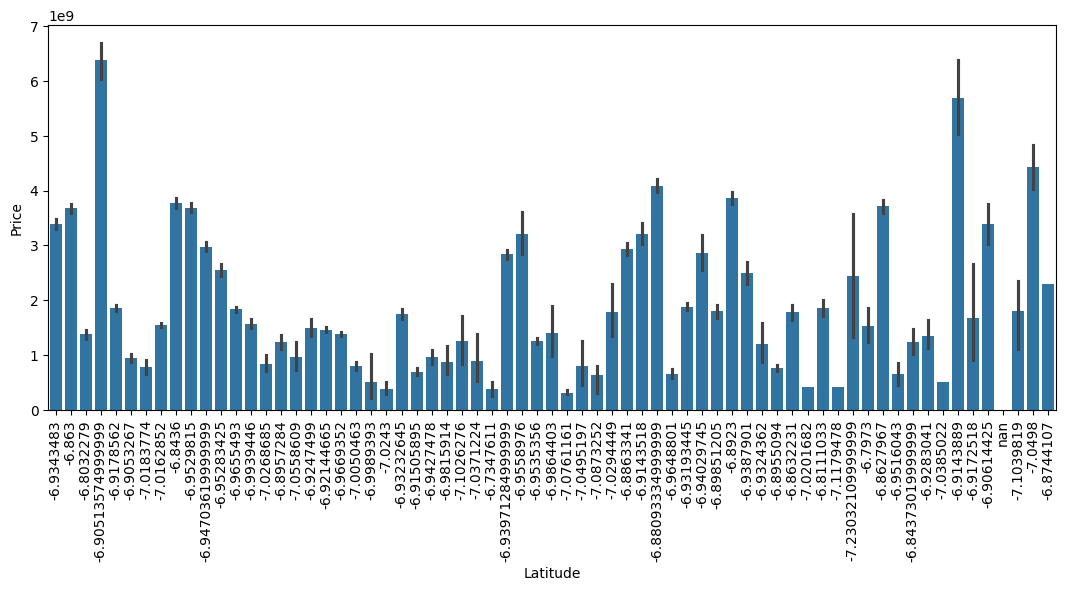

In [39]:
plt.figure(figsize=(13,5))
sns.barplot(data=df, x='Latitude', y='Price', order=df.sort_values('Price')['Latitude'])
plt.xticks(rotation=90)
plt.show()

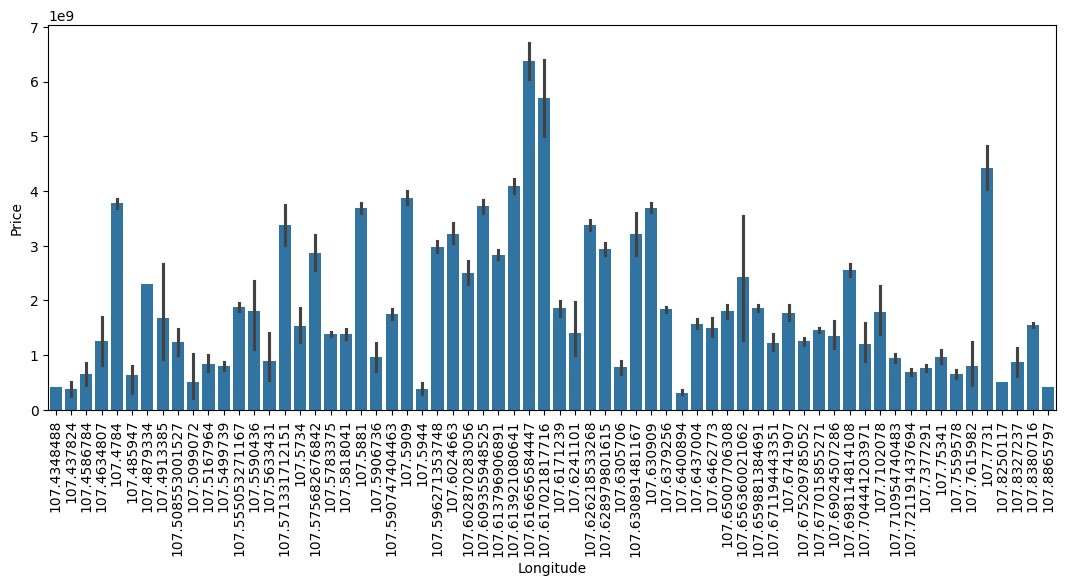

In [40]:
plt.figure(figsize=(13,5))
sns.barplot(data=df, x='Longitude', y='Price')
plt.xticks(rotation=90)
plt.show()

In [41]:
df['Price'].max()

9700000000.0

In [42]:
df['Price'].min()

10200000.0

**11. Correlation plot**

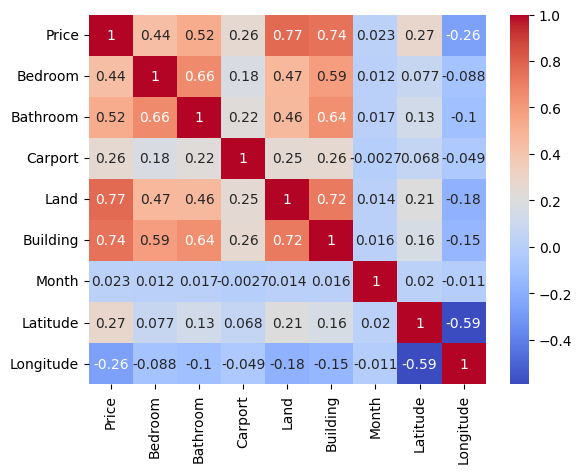

In [43]:
dff=df.select_dtypes(include=[np.number])
dff.corr()
sns.heatmap(dff.corr(), annot=True,cmap='coolwarm')
plt.show()

Major parameters affecting the price are

1. Number of bedroom
2. Numbero of bathroom
3. Land
4. Building

Influence of other parameters is less

**Key Drivers of price**

1. Location
2. Number of bedroon
3. Number of bathroom
4. Land
5. Buildin

**11. Filling missing values**

In [44]:
df.head(5)

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


In [45]:
df.isna().sum()

,0
Price,0
Location,9
Bedroom,0
Bathroom,15
Carport,15
Land,3
Building,9
Month,9
City/Regency,9
Latitude,10


In [46]:
df.columns

Index(['Price', 'Location', 'Bedroom', 'Bathroom', 'Carport', 'Land',
       'Building', 'Month', 'City/Regency', 'Latitude', 'Longitude'],
      dtype='object')

**Replace all the null vaues with mode**

if we take mean, it may result in flaoting values. so better use mode values

In [47]:
for column in ['Location', 'Bathroom', 'Carport', 'Land','Building', 'Month', 'City/Regency', 'Latitude', 'Longitude']:
  df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-47-94d5e0d20cc2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [48]:
df.isna().sum()

,0
Price,0
Location,0
Bedroom,0
Bathroom,0
Carport,0
Land,0
Building,0
Month,0
City/Regency,0
Latitude,0


**12. Outlier handling**

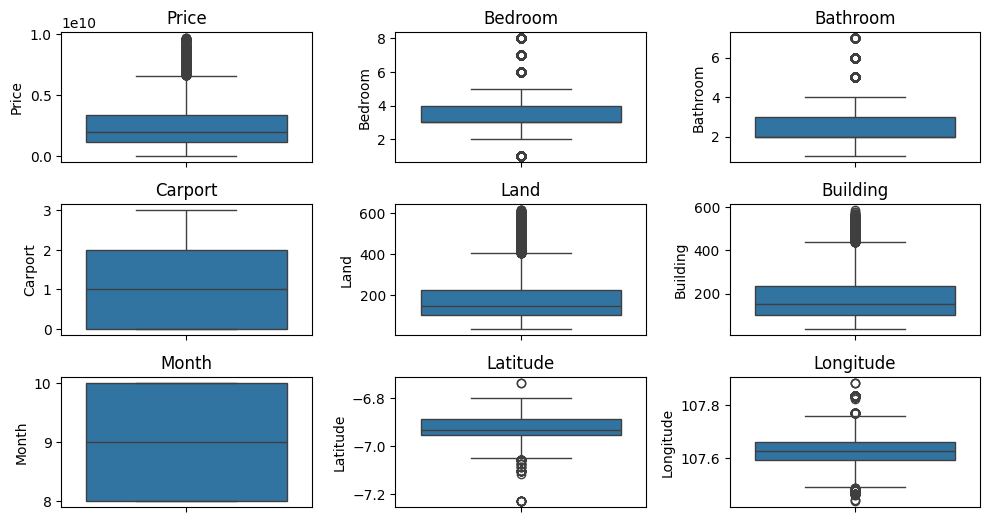

In [49]:
numerical=df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,7))
for i, col in enumerate(numerical.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data=numerical, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

Better option is to use capping for replacing outliers

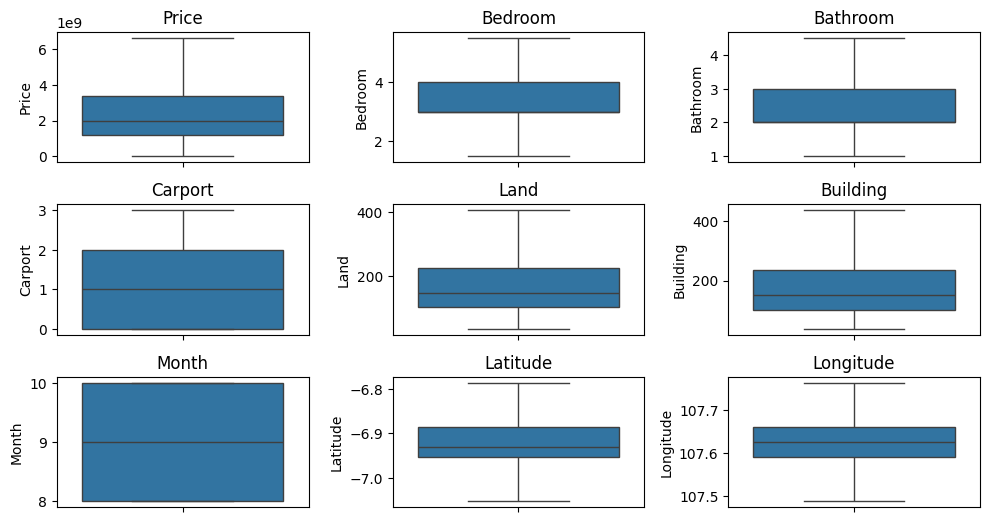

In [50]:
def cap_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
  return df

for column in numerical.columns:
  df = cap_outliers_iqr(df, column)


plt.figure(figsize=(10,7))
for i, col in enumerate(numerical.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

**13. Dropping month**

In [51]:
df.sample(5)

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
22471,3.500000e+09,Bojongloa Kaler,3.0,2.0,1.0,311.0,230.0,10.0,Bandung City,-6.932326,107.590747
10654,6.000000e+09,Bandung Kulon,4.0,3.0,0.0,195.0,320.0,8.0,Bandung City,-6.931934,107.555053
31333,2.700000e+09,Bandung Kulon,4.0,4.0,0.0,185.0,260.0,10.0,Bandung City,-6.931934,107.555053
1286,1.650000e+09,Arcamanik,5.0,2.0,1.0,186.0,210.0,8.0,Bandung City,-6.921447,107.677016
19392,2.550000e+09,Gedebage,4.0,2.0,1.0,150.0,104.0,9.0,Bandung City,-6.952834,107.698115


sine month is not making any difference in property price we can drop it

In [52]:
df.drop('Month', axis=1, inplace=True)

In [53]:
df.head(2)

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,City/Regency,Latitude,Longitude
0,1.600000e+09,Padalarang,2.0,1.0,1.0,72.0,50.0,West Bandung Regency,-6.843600,107.487046
1,8.500000e+08,Parongpong,2.0,1.0,1.0,70.0,80.0,West Bandung Regency,-6.803228,107.581804


**14. Encoding location and city/regency using OneHotEncoder (get dummies)**

In [54]:
df = pd.get_dummies(df, columns=['Location', 'City/Regency'], prefix=['Location', 'City/Regency'])


In [55]:
df.sample(5)

,Price,Bedroom,Bathroom,Carport,Land,Building,Latitude,Longitude,Location_Andir,Location_Antapani,...,Location_Rancasari,Location_Regol,Location_Soreang,Location_Sukajadi,Location_Sukasari,Location_Sumur Bandung,Location_Ujungberung,City/Regency_Bandung City,City/Regency_Bandung Regency,City/Regency_West Bandung Regency
29724,1.600000e+09,2.0,2.0,1.0,116.0,100.0,-6.934348,107.626219,False,False,...,False,False,False,False,False,False,False,True,False,False
27044,2.800000e+09,4.0,3.0,2.0,180.0,270.0,-6.952981,107.630909,False,False,...,False,False,False,False,False,False,False,True,False,False
25997,4.000000e+09,4.0,3.0,2.0,145.0,275.0,-6.947036,107.596271,False,False,...,False,False,False,False,False,False,False,True,False,False
17565,1.000000e+09,2.0,2.0,1.0,120.0,70.0,-6.932326,107.590747,False,False,...,False,False,False,False,False,False,False,True,False,False
13681,3.600000e+09,4.0,3.0,2.0,144.0,200.0,-6.952834,107.698115,False,False,...,False,False,False,False,False,False,False,True,False,False


In [56]:
df.shape

(32536, 77)

**15. Standardization using StandardScaler**

In [57]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Price', axis=1)
y = df['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

**16. Train_test_split the data**

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [59]:
X_train.shape

(26028, 76)

In [60]:
X_test.shape

(6508, 76)

**17. Model-1: Linear Regression**

In [61]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [62]:
y_pred

array([1.30487726e+09, 2.05231534e+09, 2.74093486e+09, ...,
       6.94540488e+08, 1.58635438e+09, 1.37408327e+09])

**18. Model Evaluation**

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 4.274389271499554e+38
R-squared (R2): -1.5194305328764355e+20


In [64]:
y_test.head(10)

,Price
3643,1.420000e+09
25320,1.600000e+09
9401,3.200000e+09
17902,1.400000e+09
5198,6.612500e+09
17054,8.500000e+08
4638,3.300000e+09
1487,1.300000e+09
20794,2.350000e+09
9811,9.000000e+08


In [65]:
y_pred[0]

1304877256.0

In [66]:
y_pred[1]

2052315336.0

In [68]:
y_pred[2]

2740934856.0

In [67]:
y_pred[4]

3521796296.0

**19. Model-2: RandomForest Regressor**

In [69]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [70]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - R-squared (R2): {r2_rf}")

Random Forest - Mean Squared Error (MSE): 2.979819831029218e+17
Random Forest - R-squared (R2): 0.8940754118038459


In [71]:
y_test.head(10)

,Price
3643,1.420000e+09
25320,1.600000e+09
9401,3.200000e+09
17902,1.400000e+09
5198,6.612500e+09
17054,8.500000e+08
4638,3.300000e+09
1487,1.300000e+09
20794,2.350000e+09
9811,9.000000e+08


In [72]:
y_pred_rf[0]

1529123333.333333

In [73]:
y_pred_rf[4]

3951949999.9999995

**20. Model-3: Lasso regressor**

In [74]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - Mean Squared Error (MSE): {mse_lasso}")
print(f"Lasso Regression - R-squared (R2): {r2_lasso}")

Lasso Regression - Mean Squared Error (MSE): 6.252562991095123e+17
Lasso Regression - R-squared (R2): 0.7777381863474917


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.439e+21, tolerance: 7.625e+18
  model = cd_fast.enet_coordinate_descent(


##**Result**



**Key Drivers of Price:**

Ans:

1. Location
2. Number of bedrooms
3. Numbr of bathroom
4. Land
5. Building

**Location Analysis:** Determine if there are noticeable differences in property prices between West Bandung Regency and Bandung City, and what factors contribute to these differences.

Ans:

There is some slight difference in price between wes Bandung Regency and Bandung city. This is not because of the number of bedroom or bathroom. It is because of prime location

**Property Recommendations:** Suggest what kind of properties would be a good investment for clients looking to buy a house with a budget of less than 1 billion IDR, taking into account both location and property features.

Ans: For less than 1bn, following factors are suitable
- Bandung Regency
- Number of bedroom-2
- Number of bathroom-1
- Carport-1


**Tasks:**

Perform exploratory data analysis (EDA) to summarize the key insights from the dataset, focusing on patterns, trends, and outliers.
Build a model to predict property prices based on the available features.
Evaluate the model’s performance using appropriate metrics.
Based on your findings, write a detailed report explaining the results and provide recommendations for both the real estate company and potential property buyers.

**Best model: RandomForest Regressor**